## Section A: Model Complexity and Model Selection

### Question 2: L-fold Cross Validation
> ##### 1. Implement L-Fold cross validation for KNN regressor

In [25]:
#importing libraries
library(reshape2)
library(ggplot2)

In [26]:
#read train and test dataset
train_data=read.csv("Task1A_train.csv")
test_data=read.csv("Task1A_test.csv")

In [27]:
train.data <- train_data['x1'] # select first column 
train.label <- train_data['y'] #select the label column (y)
test.data <- test_data['x1'] # select first column from test dataset
test.label <- test_data['y'] # select second column as test label


> KNN Regressor

In [17]:
knn <- function(train.data, train.label, test.data, K, distance = 'euclidean'){
    ## count number of train samples
    train.len <- nrow(train.data)
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    test.label<-c()
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the majority vote
        test.label[i]<- (mean(train.label[nn,1]))
        
    }
    
    ## return the class labels as output
    return (test.label)
}

> L-fold Cross Validation

In [18]:
#Randomly shuffle the data
cv<-function(train.data,train.label,K,numFold=10)
{
    miss <- data.frame('K'=1:10, 'Error'=rep(0,10))

#Create 10 equally size folds
folds <- rep_len(1:numFold,nrow(train.data))

#Perform 10 fold cross validation
for(i in 1:numFold){
    #Segement your data by fold using the which() function 
    testIndex <- which(folds==i,arr.ind=TRUE)
    testData <- train.data[testIndex, ]
    testLabel <- train.label[testIndex, ]
    trainData <- train.data[-testIndex, ]
    trainLabel <- train.label[-testIndex, ]

    trainData= data.frame(trainData)
    
    colnames(trainData)[1]<-"x1"
    trainLabel<-data.frame(y<-trainLabel)
    colnames(trainLabel)[1]<-"y"
    testData<-data.frame(x1<-testData)
    colnames(testData)[1]<-"x1"
    miss[i,'Error'] <- sqrt(sum((knn(trainData, trainLabel, testData, K=K)- testLabel)**2)/nrow(testData))
    #Use the test and train data partitions however you desire...
}
    return(mean(miss$Error))
}

> ##### 2. L-fold CV for k =1:15 and numFold = 10

In [28]:
miss <- data.frame('K'=1:15, 'Error'=rep(0,15))
for (K in 1:15){
    miss[K,'Error'] <- cv(train.data,train.label,K,10)
}

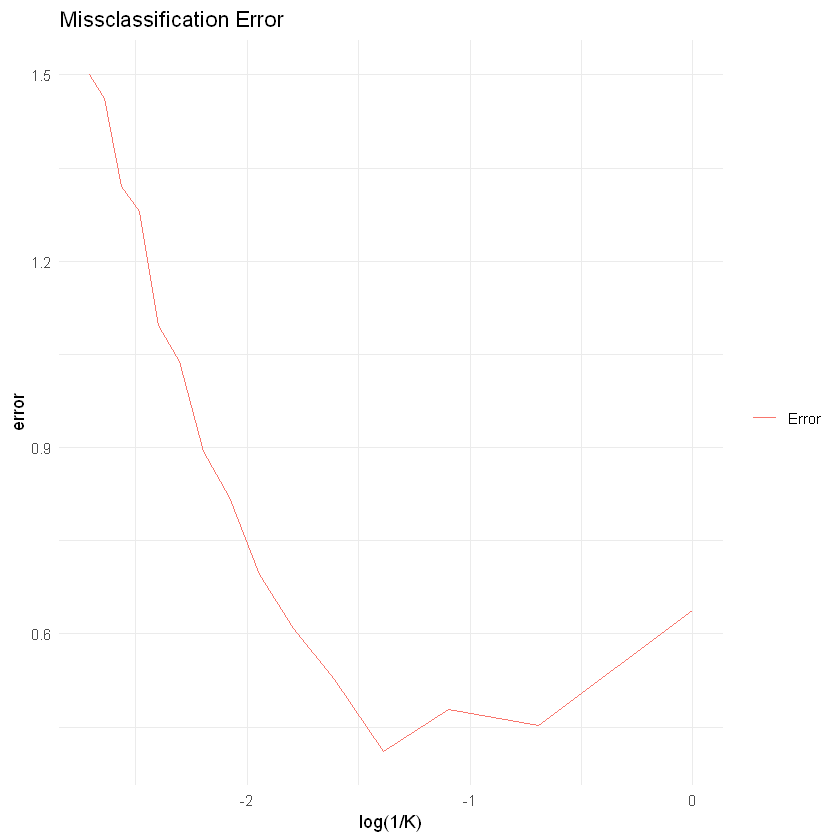

In [29]:
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=log(1/K), y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error")

> ##### 3. Report Optimum value for K
> * The optimum value for K is 4 as we can see from the above plot and also from the below code. The error at K = 4 is 0.4105 is the lowest.
> * As we increase the K, we can see the trend going downwards, that is the error decreases as we increase the K.
> * After we passed the optimum value K, we can see the trend upwards, the error starts increasing again.

In [53]:
library(plyr)
head(arrange(miss,(Error),K))

K,Error
4,0.4105932
2,0.4530109
3,0.4779199
5,0.5257789
6,0.6085199
1,0.6383661
